# Data Preparation

In [1]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from geopy.geocoders import Nominatim

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import plotly.io as pio
pio.renderers.default = 'browser'

import warnings
warnings.filterwarnings('ignore')

# style.use('fivethirtyeight')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

pd.set_option('display.max_colwidth', -1)

rand_state=1000

# <div class="alert alert-success" font-size=5> <b>Related Data Sets</b> </div>

## 1. Primary Land Use Tax Lot Output (PLUTO)

The Primary Land Use Tax Lot Output (PLUTO™) data file contains extensive land use and geographic data at the tax lot level in a comma-delimited file. The PLUTO tax lot data files contain over seventy data fields derived from data files maintained by the Department of City Planning (DCP), Department of Finance (DOF), Department of Citywide Administrative Services (DCAS), and Landmarks Preservation Commission (LPC). DCP has created additional fields based on data obtained from one or more of the major data sources. PLUTO data files contain three basic types of data:

- Tax Lot Characteristics;
- Building Characteristics; and
- Geographic/Political/Administrative Districts.

There are two idiosyncrasies regarding the tax lot data

The PLUTO data contain one record per tax lot except for condominiums. PLUTO data contain one record per condominium complex instead of records for each condominium unit tax lot. A tax lot is usually a parcel of real property. The parcel can be under water, vacant, or contain one or more buildings or structures.

The Department of Finance (DOF) assigns a tax lot number to each condominium unit and a billing tax lot number to the Condominium Complex (a Condo BBL). A Condominium Complex is defined as one or more structures or properties under the auspices of the same condominium association.

DCP summarizes DOF’s condominium unit tax lot data so that each Condominium Complex within a tax block is represented by only one record. The Condominium Complex record is assigned the billing tax lot number when one exists. When the billing tax lot number has not yet been assigned by DOF, the lowest tax lot number within the tax block of the Condominium Complex is assigned.


The second idiosyncrasy is related to borough and community district geography. Two portions of the City, Marble Hill and Rikers Island, are legally located in one borough but are serviced by another borough. 

Specifically, Marble Hill is legally located in Manhattan but is serviced by The Bronx, while Rikers Island is legally part of The Bronx but is serviced by Queens. Therefore, Marble Hill tax lots are located in the Manhattan borough file and Rikers Island tax lots are in The Bronx borough file.


Source: https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/64uk-42ks

Data Description:
https://data.cityofnewyork.us/api/views/64uk-42ks/files/4236b586-c55e-4358-a21a-3647735dd58b?download=true&filename=pluto_datadictionary.pdf


In [2]:
raw_pluto=pd.read_csv('data/pluto_22v1.csv')

In [3]:
raw_pluto.head(5)

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,11670,53,410.0,4017600.0,4.017600e+10,176.0,1003.0,27.0,28.0,11420.0,L126,106.0,45.0,3220.0,4.0,10.0,3E,115-27 126 STREET,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0.0,NaN,"ALFARO, MARIA T",1642.0,940.0,0.0,940.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,16.42,100.0,16.0,26.0,G,3.0,N,5.0,2.0,6180.0,27480.0,0.0,1935.0,0.0,0.0,NaN,NaN,0.57,0.5,0.0,1.0,4,4.116700e+09,NaN,176.0,1036170.0,186369.0,18c,NaN,415 033,45102.0,NaN,NaN,NaN,1,NaN,NaN,22v1,NaN,40.678064,-73.812815,NaN
1,QN,11683,43,410.0,4017800.0,4.017800e+10,178.0,1003.0,27.0,28.0,11420.0,L126,106.0,45.0,3220.0,4.0,10.0,3E,116-45 126 STREET,C8-1,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,A1,1.0,0.0,NaN,"SAMMY, RICK MICHAEL",2000.0,868.0,0.0,868.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,20.00,100.0,14.0,27.0,N,1.0,N,5.0,2.0,6720.0,28320.0,0.0,1925.0,0.0,0.0,NaN,NaN,0.43,0.0,1.0,2.4,4,4.116830e+09,NaN,178.0,1036475.0,185553.0,18c,NaN,415 033,45102.0,NaN,NaN,NaN,1,NaN,NaN,22v1,NaN,40.675823,-73.811721,NaN
2,QN,11689,48,410.0,4017800.0,4.017800e+10,178.0,2003.0,27.0,28.0,11420.0,L126,106.0,45.0,3220.0,4.0,10.0,3E,116-35 133 STREET,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A2,1.0,0.0,NaN,"UPSHUR, ALMA",4000.0,1128.0,0.0,1128.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.5,1.0,1.0,40.00,100.0,26.0,37.0,N,1.0,N,5.0,2.0,10680.0,40020.0,8180.0,1945.0,0.0,0.0,NaN,NaN,0.28,0.5,0.0,1.0,4,4.116890e+09,NaN,178.0,1037943.0,186200.0,18c,NaN,415 035,45102.0,NaN,NaN,NaN,1,NaN,NaN,22v1,NaN,40.677590,-73.806424,NaN
3,QN,11681,40,410.0,4017800.0,4.017800e+10,178.0,1005.0,27.0,28.0,11420.0,L126,106.0,45.0,3220.0,4.0,10.0,3E,116-21 124 STREET,C8-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B3,1.0,0.0,NaN,"SINGH, BHOOPNARINE",4000.0,1616.0,0.0,1616.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,40.00,100.0,24.0,33.0,N,1.0,N,5.0,2.0,12180.0,53160.0,0.0,1955.0,0.0,0.0,NaN,NaN,0.40,0.0,1.0,2.4,4,4.116810e+09,NaN,178.0,1035901.0,185604.0,18c,NaN,415 031,45102.0,NaN,NaN,NaN,1,NaN,NaN,22v1,NaN,40.675966,-73.813790,NaN
4,QN,11689,52,410.0,4017800.0,4.017800e+10,178.0,2003.0,27.0,28.0,11420.0,L126,106.0,45.0,3220.0,4.0,10.0,3E,116-27 133 STREET,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B3,1.0,0.0,NaN,"CAUGHMAN, BETTY",4000.0,1017.0,0.0,1017.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.5,2.0,2.0,40.00,100.0,22.0,38.0,G,1.0,N,5.0,2.0,11640.0,36360.0,0.0,1925.0,0.0,0.0,NaN,NaN,0.25,0.5,0.0,1.0,4,4.116890e+09,NaN,178.0,1037915.0,186274.0,18c,NaN,415 035,45102.0,NaN,NaN,NaN,1,NaN,NaN,22v1,NaN,40.677793,-73.806524,NaN


In [4]:
raw_pluto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859877 entries, 0 to 859876
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859877 non-null  object 
 1   block                 859877 non-null  int64  
 2   lot                   859877 non-null  int64  
 3   cd                    857152 non-null  float64
 4   bct2020               857123 non-null  float64
 5   bctcb2020             835635 non-null  float64
 6   ct2010                857123 non-null  float64
 7   cb2010                835635 non-null  float64
 8   schooldist            856439 non-null  float64
 9   council               857152 non-null  float64
 10  zipcode               856425 non-null  float64
 11  firecomp              856420 non-null  object 
 12  policeprct            856434 non-null  float64
 13  healthcenterdistrict  856434 non-null  float64
 14  healtharea            856434 non-null  float64
 15  

In [5]:
pluto=raw_pluto[raw_pluto['borough']=='MN']
print('There are '+str(len(pluto))+' records for Manhattan in PLUTO dataset')

There are 42988 records for Manhattan in PLUTO dataset


<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 42988 records for Manhattan in PLUTO dataset</font> </li>
    <li> <font color='red'>Information in PLUTO data set mainly included: <br/>
          - Tax Lot Characteristics;<br/>
          - Building Characteristics; and <br/>
          - Geographic/Political/Administrative Districts.</font> </li>
    <li> <font color='red'>Could be used for data modelings.</font> </li>
</div>

## 2. Heating Gas Consumption And Cost (2010 - Feb 2022)Housing & Development

Monthly consumption and cost data by borough and development. Data set includes utility vendor and meter information.

Source: https://data.cityofnewyork.us/Housing-Development/Heating-Gas-Consumption-And-Cost-2010-Feb-2022-/it56-eyq4

In [6]:
raw_Gas=pd.read_csv('data/Heating_Gas_Consumption_And_Cost__2010_-__Feb_2022_.csv')
raw_Gas_Description=pd.read_csv('data/Heating_Gas_Consumption_And_Cost__2010_-__Feb_2022_Description.csv')

In [7]:
df_datatypes = pd.DataFrame(raw_Gas.dtypes).reset_index()
Gas_Description=raw_Gas_Description.merge(df_datatypes,left_on='Column Name', right_on='index').rename(columns = {0:'Data Type'}).drop(columns=['index'],axis=1)

Description: 

In [8]:
Gas_Description[['Column Name','Description']]

,Column Name,Description
0,Development Name,Development name
1,Borough,Borough
2,Account Name,name of all the development an account supplies
3,Location,"Building number. \nIn order to run an analysis by building, you can use a combination of TDS and building number which gives a unique identifier for each building"
4,Meter AMR,"Is the meter Automatic Meter Reading (AMR), Interval or none"
5,Meter Scope,The buildings or areas the account and meter supply
6,TDS #,TDS (Tenant Data System) number is the unique identifier for all NCYHA developments. It is recommended to use it in order to run analysis by development. The TDS is also the unique link between NYCHA data sets.
7,EDP,NYCHA Electronic Data Processing. Number used to identify individual NYCHA developments. EDP is used by NYCHA only to link data issued from a different system (the energy management system that was used by NYCHA before 2010). It is recommended to use the TDS # as a unique identifier of each development.
8,RC Code,NYCHA budget responsibility code. Code representing a specific development.\n
9,Funding Source,"The development's funding source including Federal,\nMixed Finance, or an indication that the facility is a non development facility which means a non residential facility."


In [9]:
raw_Gas.head(3)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,BETANCES I,BRONX,BETANCES I,NaN,NONE,NaN,211.0,326,B021100,FEDERAL,NY005012110P,CONSOLIDATED EDISON COMPANY OF NY,1841847,2010-01,12/09/2009,01/31/2010,53.0,2545269,N,0.00,NaN,Yes,0.0,UTILITY GAS,ConEd
1,ADAMS,BRONX,ADAMS,BLD 04,NONE,BLD 1-7,118.0,248,B011800,FEDERAL,NY005001180P,CONSOLIDATED EDISON COMPANY OF NY,1838631,2010-01,12/24/2009,01/26/2010,33.0,3299599,N,78292.97,Trans Res MultiDwell Heat Dual,Yes,136632.0,UTILITY GAS,ConEd
2,ADAMS,BRONX,ADAMS,BLD 04,Not Applicable,NaN,118.0,248,B011800,FEDERAL,NY005001180P,HESS CORPORATION (905243) - 2,1851664,2010-01,12/25/2009,01/26/2010,32.0,3.95416E+14,N,133779.54,NaN,Yes,136632.0,BROKERED GAS,ConEd


In [10]:
gas=raw_Gas[raw_Gas['Borough']=='MANHATTAN']
print('There are '+str(len(gas))+' records for Manhattan in Heating Gas Consumption And Cost (2010 - Feb 2022)Housing & Development dataset')

There are 55599 records for Manhattan in Heating Gas Consumption And Cost (2010 - Feb 2022)Housing & Development dataset


In [11]:
gas[['Development Name',
 'Account Name',
 'Location',
 'Meter AMR',
 'Meter Scope',
 'Revenue Month',
 'Service Start Date',
 'Service End Date',
 'Meter Number',
 'Estimated',
 'Current Charges',
 'Rate Class',
 'Bill Analyzed',
 'Consumption (Therms)',
 'ES Commodity',
 'Underlying Utility']].head()

,Development Name,Account Name,Location,Meter AMR,Meter Scope,Revenue Month,Service Start Date,Service End Date,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
7,ALLEN STREET,ALLEN STREET,BLD 01,NONE,BLD 1-7,2010-01,12/24/2009,01/26/2010,2544977,N,18.84,Trans Res MultiDwell Heat,Yes,0.0,UTILITY GAS,ConEd
8,ALLEN STREET,ALLEN STREET,BLD 01,Not Applicable,NaN,2010-01,12/25/2009,01/26/2010,4.95416E+14,N,0.00,NaN,Yes,0.0,BROKERED GAS,ConEd
9,AMSTERDAM,AMSTERDAM,BLD 02,NONE,BLD 1-13,2010-01,12/24/2009,01/26/2010,3513334,N,95456.57,Trans Res MultiDwell Heat Dual,Yes,169137.0,UTILITY GAS,ConEd
10,AMSTERDAM,AMSTERDAM,BLD 02,Not Applicable,NaN,2010-01,12/25/2009,01/26/2010,4.95416E+14,N,165605.93,NaN,Yes,169137.0,BROKERED GAS,ConEd
11,AMSTERDAM AVENUE,AMSTERDAM AVENUE,BLD 01,NONE,NaN,2010-01,12/24/2009,01/26/2010,2545168,N,14607.73,Trans Res MultiDwell Heat Dual,Yes,26301.0,UTILITY GAS,ConEd


<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 55599 records for Manhattan in Heating Gas Consumption And Cost (2010 - Feb 2022)Housing & Development dataset</font> </li>
    <li> <font color='red'>The dataset is not for individual buildings, but for meter scopes</font> </li>
    <li> <font color='red'>No address information because of the above reason.</font> </li>
    <li> <font color='red'>Could be used for dash boards and trend analysis.</font> </li>
    <li> <font color='red'>Won't be used for data modelings because it will lead to inaccurate result.</font> </li>
</div>

## 3. NEW YORK CITY'S 2020 ENERGY AND WATER USE
New York City's 2020 Energy and Water Use Report created by Urban Green Council presents a trend analysis of 10 years of benchmarked energy and emissions, evaluates the energy and water use of midsize buildings for the first time and assesses the progress NYC’s benchmarked building stock has made towards citywide decarbonization goals and mandates.

Source: https://www.urbangreencouncil.org/content/projects/new-york-citys-2020-energy-and-water-use-report

In [12]:
raw_Energy=pd.read_csv('data/2019_LL84_with_Urban_Green_Flags.csv')
raw_Energy=raw_Energy.iloc[: , :70]
raw_Energy=raw_Energy.set_axis(['Primary Property Type - Self Selected', 
'Order', 
'Property Id', 
'Property Name', 
'Parent Property Id', 
'Parent Property Id2', 
'Parent Property Name', 
'City Building', 
'BBL - 10 digits', 
'NYC Borough, Block and Lot (BBL) self-reported', 
'NYC Building Identification Number (BIN)', 
'Address 1 (self-reported)', 
'Address 2 (self-reported)', 
'Postal Code', 
'Street Number', 
'Street Name', 
'Borough', 
'Self Reported Gross Floor Area (ft)',
'List of All Property Use Types at Property', 
'Largest Property Use Type', 
'Largest Property Use Type - Gross Floor Area (ft)', 
'2nd Largest Property Use Type', 
'2nd Largest Property Use - Gross Floor Area (ft)', 
'3rd Largest Property Use Type', 
'3rd Largest Property Use Type - Gross Floor Area (ft)', 
'Year Built', 
'Number of Buildings - Self-reported', 
'Occupancy', 
'Metered Areas (Energy)', 
'Metered Areas  (Water)', 
'ENERGY STAR Score', 
'Source EUI kBtu ft',
'Weather Normalized Site EUI (kBtu/ft)', 
'Site EUI (kBtu/ft)', 
'Weather Normalized Source EUI (kBtu/ft)', 
'Weather Normalized Site Electricity Intensity (kWh/ft)', 
'Weather Normalized Site Natural Gas Intensity (therms/ft)', 
'Fuel Oil #1 Use (kBtu)', 
'Fuel Oil #2 Use (kBtu)', 
'Fuel Oil #4 Use (kBtu)', 
'Fuel Oil #5 & 6 Use (kBtu)', 
'Diesel #2 Use (kBtu)', 
'Kerosene Use (kBtu)',
'Propane Use (kBtu)',
'District Steam Use (kBtu)', 
'District Hot Water Use (kBtu)',
'District Chilled Water Use (kBtu)',
'Natural Gas Use (kBtu)', 
'Weather Normalized Site Natural Gas Use (therms)', 
'Electricity Use - Grid Purchase (kBtu)', 
'Electricity Use Grid Purchase (kWh)',
'Weather Normalized Site Electricity (kWh)', 
'Annual Maximum Demand (kW)',
'Annual Maximum Demand (MM/YYYY)',
'Total GHG Emissions (Metric Tons CO2e)', 
'Direct GHG Emissions (Metric Tons CO2e)', 
'Indirect GHG Emissions (Metric Tons CO2e)', 
'Water Use (All Water Sources) (kgal)', 
'Water Intensity (All Water Sources) (gal/ft)', 
'Water Required', 
'Generation Date',
'Latitude',
'Longitude',
'Community Board', 
'Council District', 
'Census Tract', 
'NTA', 
'Data Quality Flag',
'Emissions Flag',
'Energy Flag'], axis=1)

In [13]:
raw_Energy.head(2)

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag
0,Adult Education,16037,6310419,The Art Students League of New York,0,0,Not Applicable: Standalone Property,No,1010290023,1010290023,1080846,215 W 57th Street,Not Available,10019,215,W 57th Street,NaN,33497.0,"Adult Education, Museum",Adult Education,31497,Museum,2000,Not Available,Not Available,1892,1,100,Whole Property,Not Available,Not Available,303.7,150.8,150.7,303.8,24.4,0.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2265826,22680,2783803,815885.9,815885.9,Not Available,Not Available,356.1,120.3,235.8,Not Available,Not Available,No,7/8/20,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,Adult Education,22837,7069172,French: 22 East 60th St.,0,0,Not Applicable: Standalone Property,No,1013740047,1013740047,1040761,22 East 60th Street,Not Available,10022,22,East 60th Street,NaN,48562.0,Adult Education,Adult Education,48562,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Property,Not Available,Not Available,249.6,129,129.4,248.9,18.5,0.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,934902.1,Not Available,Not Available,2274756.9,22658.3,3074890.2,901198.7,898735.9,Not Available,Not Available,443.3,120.8,322.5,Not Available,Not Available,No,4/17/20,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


Description: 

In [14]:
raw_Energy_Description=pd.read_csv('data/2019_LL84_with_Urban_Green_Flags_Description.csv')
raw_Energy_Description[['Column Name','Column Description']]

,Column Name,Column Description
0,Primary Property Type,NaN
1,Order,Order of BBLs on the disclosure data set
2,Property Id,Number assigned to each benchmarking submission by Portfolio Manager. This value is unique for each record represented by the BBL field. Note that if there was no benchmarking submission received by the Department of Finance then there is no assigned Entry Number in the column.
3,Property Name,Basic property information includes property name.
4,Parent Property Id,The ID for the campus is referred to as the Parent Property ID.
5,Parent Property Name,"When you are benchmark a campus (or, collection of buildings) you can track information for the entire campus, as well as for individual buildings on the campus. If you choose to track at both of these levels, then you have ""parent-child"" relationship. The ""parent"" is the entire campus or complex. That is, the parent is the multi-building property for which you have also chosen to benchmark individual buildings separately."
6,City Building,"A building that is more than 10,000 gross square feet, as it appears in the records of the department of finance, that is owned by the city or for which the city regularly directly pays all [or part] of the annual energy bills, provided that two or more buildings on the same tax lot shall be deemed to be one building."
7,BBL - 10 digits,"10-digit property borough, block and lot identifier, originally entered into the ""Standard IDs"" field in Portfolio Manager and then verified and corrected, as necessary, by the Department of Finance (DOF). The first number represents the borough, where 1 is Manhattan, 2 is the Bronx, 3 is Brooklyn, 4 is Queens, and 5 is Staten Island. The following five numbers represent the tax block. If a property has a tax block that is less than 5 digits, then zeros are added before the block number so there are five digits in total. The last four digits are the tax lot number."
8,"NYC Borough, Block and Lot (BBL) self-reported","10-digit property borough, block and lot identifier, self-reported"
9,NYC Building Identification Number (BIN),Self-reported seven-digit building identification number.


In [15]:
# get borough names
zip_nyc=pd.read_csv('data/zip_nyc.csv')
zip_nyc['Postal Code']=zip_nyc['Postal Code'].astype(str)
energy=raw_Energy.merge(zip_nyc, on='Postal Code', how='left')
energy['Borough']= np.where(energy['Borough'].isna(), energy['Suburb'], energy['Borough'])

# Keep Data for Manhattan Area
energy=energy[energy['Borough']=='Manhattan']

energy.drop_duplicates(inplace=True)

print('There are '+str(len(energy))+' records for Manhattan in "NEW YORK CITYS 2020 ENERGY AND WATER USE REPORT" dataset')

There are 9781 records for Manhattan in "NEW YORK CITYS 2020 ENERGY AND WATER USE REPORT" dataset


In [16]:
energy['Metered Areas (Energy)'].unique()

array(['Whole Property', 'Another configuration', 'Not Available',
       'Common areas (all energy loads)',
       'Tenant Hot Water, Tenant Heating, Common Area Plug Load/Electricity, Common Area Heating, Common Area Cooling, Common Area Hot Water',
       'Common Area Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Tenant Plug Load/Electricity'],
      dtype=object)

In [17]:
energy[['Primary Property Type - Self Selected',
 'Address 1 (self-reported)',
 'Self Reported Gross Floor Area (ft)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Source EUI kBtu ft',
 'Weather Normalized Site EUI (kBtu/ft)',
 'Site EUI (kBtu/ft)',
 'Weather Normalized Source EUI (kBtu/ft)',
 'Weather Normalized Site Electricity Intensity (kWh/ft)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Kerosene Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Water Use (All Water Sources) (kgal)',
 'Water Intensity (All Water Sources) (gal/ft)',
 'Water Required',
 'Generation Date',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract']].head()

,Primary Property Type - Self Selected,Address 1 (self-reported),Self Reported Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract
0,Adult Education,215 W 57th Street,33497.0,1892,1,Whole Property,Not Available,Not Available,303.7,150.8,150.7,303.8,24.4,0.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2265826,22680,2783803,815885.9,815885.9,Not Available,Not Available,356.1,120.3,235.8,Not Available,Not Available,No,7/8/20,NaN,NaN,NaN,NaN,NaN
2,Adult Education,22 East 60th Street,48562.0,1939,1,Whole Property,Not Available,Not Available,249.6,129,129.4,248.9,18.5,0.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,934902.1,Not Available,Not Available,2274756.9,22658.3,3074890.2,901198.7,898735.9,Not Available,Not Available,443.3,120.8,322.5,Not Available,Not Available,No,4/17/20,NaN,NaN,NaN,NaN,NaN
14,Adult Education,235 East 11th Street,41759.0,1926,1,Whole Property,Whole Property,Not Available,130.2,86.5,85.6,131,7.1,0,Not Available,2535684.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,16860,169.7,1020492.7,299089.3,298546.5,Not Available,Not Available,275.5,189.1,86.4,840.1,20.12,Yes,5/1/20,NaN,NaN,NaN,NaN,NaN
24,Ambulatory Surgical Center,335-347 East 24th Street,191056.0,1977,1,Whole Property,Not Available,Not Available,430.2,228.3,227.6,430.7,28.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,24790159.9,Not Available,Not Available,Not Available,Not Available,18702042,5481254.3,5473925.8,Not Available,Not Available,3229.9,0,3229.9,Not Available,Not Available,No,4/30/20,NaN,NaN,NaN,NaN,NaN
26,Ambulatory Surgical Center,240 E. 38th St,534472.0,1970,1,Whole Property,Whole Property,Not Available,571.2,278.3,279,569.6,43.1,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,70339058.8,Not Available,Not Available,Not Available,Not Available,78804258.1,23096204.1,23024628.9,Not Available,Not Available,11344.3,0,11344.3,73333.7,137.21,No,7/15/20,NaN,NaN,NaN,NaN,NaN


<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 9781 records for Manhattan in "NEW YORK CITYS 2020 ENERGY AND WATER USE REPORT" dataset</font> </li>
    <li> <font color='red'> Gas and water meter information was collected for every buildings</font> </li>
    <li> <font color='red'>Could be used for data modelings.</font> </li>
</div>

## 4. DOB Permit Issuance
The Department of Buildings (DOB) issues permits for construction and demolition activities in the City of New York. The construction industry must submit an application to DOB with details of the construction job they would like to complete. The primary types of application, aka job type, are: New Building, Demolition, and Alterations Type 1, 2, and 3. Each job type can have multiple work types, such as general construction, boiler, elevator, and plumbing. Each work type will receive a separate permit. (See the DOB Job Application Filings dataset for information about each job application.) Each row/record in this dataset represents the life cycle of one permit for one work type. The dataset is updated daily with new records, and each existing record will be updated as the permit application moves through the approval process to reflect the latest status of the application.
    
Source: https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a
            
        

In [18]:
raw_Permit=pd.read_csv('data/DOB_Permit_Issuance.csv')
raw_Permit_Description=pd.read_csv('data/DOB_Permit_Issuance_Description.csv')

Description:

In [19]:
raw_Permit_Description[['Column Name','Column Description']]

,Column Name,Column Description
0,BOROUGH,The name of the NYC borough where the proposed work will take place.
1,Bin #,Building Identification Number assigned by Department of City Planning.
2,House #,The house number for the building where the proposed work will take place.
3,Street Name,The street name for the building where the proposed work will take place.
4,Job #,The DOB Job Application Number assigned when the applicant begins the application.
5,Job doc. #,A sequential number assigned to each of the documents that make up a job application.
6,Job Type,"2-digit code to indicate the overall job type for the application.\n\nNote: You should also look at the Permit Type field to find out what this specific permit has been issued for. An NB job, for example, can have several different Work/Permit Types such as PL, SP, EQ, etc. And each Work/Permit Type will be issued a seperate permit."
7,Self_Cert,Indicates whether or not the application was submitted as Professionally Certified. A Professional Engineer (PE) or Registered Architect (RA) can certify compliance with applicable laws and codes on applications filed by him/her as applicant.
8,Block,Tax Block assigned to the location of the proposed work by the Department of Finance.
9,Lot,Tax Lot assigned to the location of the proposed work by the Department of Finance.


In [20]:
raw_Permit.columns.tolist()

['BOROUGH',
 'Bin #',
 'House #',
 'Street Name',
 'Job #',
 'Job doc. #',
 'Job Type',
 'Self_Cert',
 'Block',
 'Lot',
 'Community Board',
 'Zip Code',
 'Bldg Type',
 'Residential',
 'Special District 1',
 'Special District 2',
 'Work Type',
 'Permit Status',
 'Filing Status',
 'Permit Type',
 'Permit Sequence #',
 'Permit Subtype',
 'Oil Gas',
 'Site Fill',
 'Filing Date',
 'Issuance Date',
 'Expiration Date',
 'Job Start Date',
 "Permittee's First Name",
 "Permittee's Last Name",
 "Permittee's Business Name",
 "Permittee's Phone #",
 "Permittee's License Type",
 "Permittee's License #",
 'Act as Superintendent',
 "Permittee's Other Title",
 'HIC License',
 "Site Safety Mgr's First Name",
 "Site Safety Mgr's Last Name",
 'Site Safety Mgr Business Name',
 'Superintendent First & Last Name',
 'Superintendent Business Name',
 "Owner's Business Type",
 'Non-Profit',
 "Owner's Business Name",
 "Owner's First Name",
 "Owner's Last Name",
 "Owner's House #",
 "Owner's House Street Name",
 '

In [21]:
permit=raw_Permit[raw_Permit['BOROUGH']=='MANHATTAN']
print('There are '+str(len(permit))+' records for Manhattan in "DOB Permit Issuance" dataset')

There are 1606871 records for Manhattan in "DOB Permit Issuance" dataset


In [22]:
permit[[
 'House #',
 'Street Name',
 'Job #',
 'Job Type',
 'Bldg Type',
 'Residential',
 'Work Type',
 'Permit Status',
 'Filing Status',
 'Permit Type',
 'Oil Gas',
 'Job Start Date',
 "Permittee's Business Name",
 'Site Safety Mgr Business Name',
 "Owner's Business Name",
 "Owner's First Name",
 "Owner's Last Name",
 "Owner's House #",
 "Owner's House Street Name",
 'Owner’s House City',
 'Owner’s House State',
 'Owner’s House Zip Code',
 "Owner's Phone #",
 'DOBRunDate',
 'PERMIT_SI_NO',
 'LATITUDE',
 'LONGITUDE']].head()

,House #,Street Name,Job #,Job Type,Bldg Type,Residential,Work Type,Permit Status,Filing Status,Permit Type,Oil Gas,Job Start Date,Permittee's Business Name,Site Safety Mgr Business Name,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE
19,433,EAST 100TH STREET,104212166,A2,2.0,NaN,MH,ISSUED,RENEWAL,EW,NaN,06/06/2018,ACS SYSTEM ASSOCIATES INC,NaN,NYC SCA,ELAN,ABNERI,NaN,NaN,NaN,NaN,NaN,7184728534,05/10/2022 00:00:00,3905801,40.785258,-73.941526
36,1615,MADISON AVENUE,104213441,A2,2.0,NaN,MH,ISSUED,RENEWAL,EW,NaN,02/01/2022,ACS SYSTEM ASSOCIATES INC,NaN,NYC SCHOOL CONST. AUTHORITY,SRIDHAR,DULIPETA-RAMA,NaN,NaN,NaN,NaN,NaN,7184728858,05/10/2022 00:00:00,3905818,40.795146,-73.948368
42,200,MONROE,103646994,A2,2.0,NaN,MH,ISSUED,RENEWAL,EW,NaN,05/24/2016,ACS SYSTEM ASSOCIATES INC,NaN,NYCSCA,ELAN,ABNERI,NaN,NaN,NaN,NaN,NaN,7184728000,05/10/2022 00:00:00,3905824,40.712399,-73.984497
43,240,WEST 113 STREET,103646609,A2,2.0,NaN,MH,ISSUED,RENEWAL,EW,NaN,05/23/2016,ACS SYSTEM ASSOCIATES INC,NaN,NYC SCA,JOSEPH,BOVA,NaN,NaN,NaN,NaN,NaN,7184728000,05/10/2022 00:00:00,3905825,40.801689,-73.954908
44,240,WEST 113 STREET,103646609,A2,2.0,NaN,OT,ISSUED,RENEWAL,EW,NaN,05/27/2016,ACS SYSTEM ASSOCIATES INC,NaN,NYC SCA,JOSEPH,BOVA,NaN,NaN,NaN,NaN,NaN,7184728000,05/10/2022 00:00:00,3905826,40.801689,-73.954908


In [23]:
permit[['Job Type','Oil Gas']].drop_duplicates()

,Job Type,Oil Gas
19,A2,NaN
92,A3,NaN
124,DM,NaN
132,NB,NaN
158,A1,NaN
934,A2,OIL
5506,A2,GAS
10019,SG,NaN


In [24]:
permit[~permit['Oil Gas'].isna()]

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
934,MANHATTAN,1062334,644,RIVERSIDE DRIVE,140749466,1,A2,Y,2088.0,114.0,109.0,10031.0,2.0,YES,NaN,NaN,FB,ISSUED,RENEWAL,EW,6,FB,OIL,NOT APPLICABLE,05/13/2022,05/13/2022,05/13/2023,04/03/2018,DOUGLAS,SIMMONS,DOUGLAS SIMMONS,3475775255,OB,0005335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,SHUHAB HDFC,LEE,WARSHAVSKY,NaN,NaN,NaN,NaN,NaN,2122656530,05/14/2022 00:00:00,3906613,40.825120,-73.953892,7.0,225.0,Hamilton Heights
2235,MANHATTAN,1064297,455,FORT WASHINGTON AVENUE,140773456,1,A2,Y,2177.0,91.0,112.0,10033.0,2.0,YES,NaN,NaN,FB,ISSUED,RENEWAL,EW,4,FB,OIL,NOT APPLICABLE,05/20/2022,05/20/2022,06/13/2022,06/15/2018,ANDREW,DEMARINIS,ALL BORO TANK TESTING LLC,7189753963,OB,0005351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,455 WASHINGTON AVE ASSOC. LLC,JONAH,SOBIN,NaN,NaN,NaN,NaN,NaN,2123151717,05/21/2022 00:00:00,3907743,40.850485,-73.938465,10.0,265.0,Washington Heights South
2236,MANHATTAN,1064298,461,FORT WASHINGTON AVENUE,140770645,1,A2,Y,2177.0,100.0,112.0,10033.0,2.0,YES,NaN,NaN,FB,ISSUED,RENEWAL,EW,4,FB,OIL,NOT APPLICABLE,05/20/2022,05/20/2022,06/13/2022,06/04/2018,ANDREW,DEMARINIS,ALL BORO TANK TESTING LLC,7189753963,OB,0005351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,455 WASHINGTON AVE ASSOC. LLC,JONAH,SOBIN,NaN,NaN,NaN,NaN,NaN,2123151717,05/21/2022 00:00:00,3907744,40.850647,-73.938400,10.0,265.0,Washington Heights South
3757,MANHATTAN,1062997,61,AUDUBON AVENUE,140365370,1,A2,Y,2125.0,28.0,112.0,10032.0,2.0,YES,NaN,NaN,FB,ISSUED,RENEWAL,EW,3,FB,OIL,NOT APPLICABLE,05/27/2022,05/27/2022,09/01/2022,06/26/2015,MICHAEL,KAPLAN,MICHAEL S. KAPLAN,9172822929,OB,0005128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARTNERSHIP,N,SOLAR REALTY MANAGEMENT CORP.,BATUHAN,CAPIN,NaN,NaN,NaN,NaN,NaN,2126339985,05/28/2022 00:00:00,3909100,40.840678,-73.938214,10.0,251.0,Washington Heights South
4176,MANHATTAN,1076217,857,10 AVENUE,103150448,1,A2,NaN,1413.0,34.0,104.0,10019.0,2.0,NaN,NaN,NaN,FB,ISSUED,INITIAL,EW,1,FB,OIL,NONE,05/28/2002,05/28/2002,02/01/2003,05/28/2002,DAVID,WAGNER,DAVID WAGNER,7186283326,OB,0002730,Y,NaN,NaN,NaN,NaN,NaN,DAVID WAGNER,DAVID WAGNER,CORPORATION,N,CBS FACILITIES OPERATIONS,ANTHONY,COPPINI,NaN,NaN,NaN,NaN,NaN,7186283341,06/01/2022 00:00:00,1523351,40.768703,-73.988873,6.0,135.0,Clinton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905710,MANHATTAN,1015634,37,WEST 26 STREET,100120021,1,A2,NaN,828,9,105.0,10010.0,2.0,NaN,NaN,NaN,FB,ISSUED,INITIAL,EW,1,FB,OIL,NONE,10/25/1990,12/07/1990,11/01/1991,12/07/1990,JOSEPH,DIGIROLAMO,CASTLE PETROLEUM,2128238800,NaN,NaN,Y,OIL BURNER INST,NaN,NaN,NaN,NaN,JOSEPH DIGIROLAMO,CASTLE PETROLEUM,CORPORATION,N,KIAMIE PRINCESS MARION REAL. COR,GILBERT,KIAMIE,NaN,NaN,NaN,NaN,NaN,2122734333,05/09/2022 00:00:00,99883,40.744179,-73.989902,3.0,58.0,Hudson Yards-Chelsea-Flatiron-Union Square
3905751,MANHATTAN,1015182,875,6 AVENUE,100129969,1,A2,NaN,807,3

In [25]:
permit['Job Type'].unique()

array(['A2', 'A3', 'DM', 'NB', 'A1', 'SG'], dtype=object)

<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 1606871 records for Manhattan in "DOB Permit Issuance" dataset</font> </li>
    <li> <font color='red'>Each record is a job application to DOB</font> </li>
    <li> <font color='red'>Primary job types are : New Building, Demolition, and Alterations.</font> </li>
    <li> <font color='red'>There are job start dates, but no end dates.</font> </li>
    <li> <font color='red'>There are permit status, but no job status, so don't know whether the job is still under construction.</font></li>
    <li> <font color='red'>Major information are permit information and business information. No emission and cost information in the dataset.</font> </li>
    <li> <font color='red'>Won't be used for data modelings.</font> </li>
</div>

# <div class="alert alert-success" font-size=5> <b>Data Mining</b> </div>


### Missing values for PLUTO and Energy Datasets

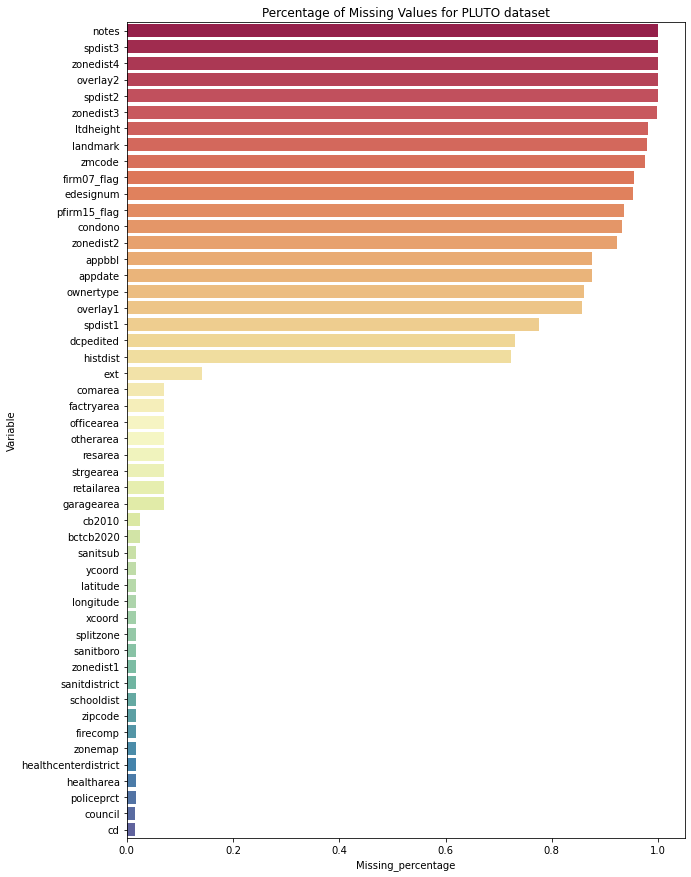

In [26]:
def missing_percentage(df, title):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0].sort_values(by='Missing_percentage', ascending=False)

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,15))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf.head(50),
               palette='Spectral').set(title=title)
    
    return nadf
pluto_na=missing_percentage(pluto, title='Percentage of Missing Values for PLUTO dataset')

In [27]:
pluto_na

,Variable,Missing_percentage
91,notes,1.0000
90,spdist3,1.0000
89,zonedist4,0.9999
88,overlay2,0.9994
87,spdist2,0.9992
86,zonedist3,0.9984
85,ltdheight,0.9801
84,landmark,0.9784
83,zmcode,0.9756
82,firm07_flag,0.9548


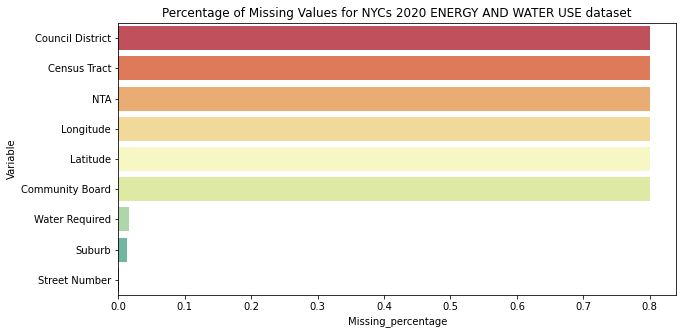

In [28]:
def missing_percentage(df, title):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0].sort_values(by='Missing_percentage', ascending=False)

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,5))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf.head(50),
               palette='Spectral').set(title=title)
    
    return nadf
energy_na=missing_percentage(energy, title='Percentage of Missing Values for NYC''s 2020 ENERGY AND WATER USE dataset')

In [29]:
energy_na

,Variable,Missing_percentage
65,Council District,0.7997
66,Census Tract,0.7997
67,NTA,0.7997
68,Longitude,0.7997
69,Latitude,0.7997
70,Community Board,0.7997
64,Water Required,0.0164
63,Suburb,0.0134
62,Street Number,0.0006


### Combine the Dataset and Fix Wrong Addresses

In [30]:
pluto=raw_pluto[raw_pluto['borough']=='MN']
print('There are '+str(len(pluto))+' records for Manhattan in PLUTO dataset')

# get borough names
zip_nyc=pd.read_csv('data/zip_nyc.csv')
zip_nyc['Postal Code']=zip_nyc['Postal Code'].astype(str)
energy=raw_Energy.merge(zip_nyc, on='Postal Code', how='left')
energy['Borough']= np.where(energy['Borough'].isna(), energy['Suburb'], energy['Borough'])

# Keep Data for Manhattan Area
energy=energy[energy['Borough']=='Manhattan']

energy.drop_duplicates(inplace=True)

print('There are '+str(len(energy))+' records for Manhattan in "NEW YORK CITYS 2020 ENERGY AND WATER USE REPORT" dataset')

There are 42988 records for Manhattan in PLUTO dataset
There are 9781 records for Manhattan in "NEW YORK CITYS 2020 ENERGY AND WATER USE REPORT" dataset


In [31]:
## PLUTO DATASET

# Keep Data for Manhattan Area
pluto['zipcode']=pluto['zipcode'].fillna(0)
pluto['zipcode'].round().astype(int).astype(str)

# 738 records in pluto do not have zip code
pluto[pluto['zipcode']==0.0].head()

pluto['address']=pluto['address']+' '
pluto['address']=pluto['address']. \
            str.replace('  ', ' '). \
            str.split(pat = " / ").str[0]. \
            str.split(pat = ", ").str[0]. \
            str.upper().str.replace(' E ', ' EAST '). \
            str.replace(' W ', ' WEST '). \
            str.replace(' S ', ' SOUTH '). \
            str.replace(' N ', ' NORTH '). \
            str.replace(' ST ', ' STREET '). \
            str.replace(' AVE ', ' AVENUE '). \
            str.replace(' PL ', ' PLACE '). \
            str.replace(' ST. ', ' STREET '). \
            str.replace('1 STREET', '1ST STREET'). \
            str.replace('2 STREET', '2ND STREET'). \
            str.replace('3 STREET', '3RD STREET'). \
            str.replace('4 STREET', '4TH STREET'). \
            str.replace('5 STREET', '5TH STREET'). \
            str.replace('6 STREET', '6TH STREET'). \
            str.replace('7 STREET', '7TH STREET'). \
            str.replace('8 STREET', '8TH STREET'). \
            str.replace('9 STREET', '9TH STREET'). \
            str.replace('0 STREET', '0TH STREET'). \
            str.replace('1 AVENUE', '1ST AVENUE'). \
            str.replace('2 AVENUE', '2ND AVENUE'). \
            str.replace('3 AVENUE', '3RD AVENUE'). \
            str.replace('4 AVENUE', '4TH AVENUE'). \
            str.replace('5 AVENUE', '5TH AVENUE'). \
            str.replace('6 AVENUE', '6TH AVENUE'). \
            str.replace('7 AVENUE', '7TH AVENUE'). \
            str.replace('8 AVENUE', '8TH AVENUE'). \
            str.replace('9 AVENUE', '9TH AVENUE'). \
            str.replace('0 AVENUE', '0TH AVENUE'). \
            str.replace('11ST ', '11TH '). \
            str.replace('12ND ', '12TH '). \
            str.replace(' FIRST ', ' 1ST '). \
            str.replace(' SECOND ', ' 2ND '). \
            str.replace(' THIRD ', ' 3RD '). \
            str.replace(' FOURTH ', ' 4TH '). \
            str.replace(' FIFTH ', ' 5TH '). \
            str.replace(' SIXTH ', ' 6TH '). \
            str.replace(' SEVENTH ', ' 7TH '). \
            str.replace(' EIGHTH ', ' 8TH '). \
            str.replace(' NINTH ', ' 9TH '). \
            str.replace(' TENTH ', ' 10TH ')

pluto['Full Address']=pluto['address']+', '+'Manhattan'

## ENERGY DATASET

energy['address']=energy['Street Number']+ ' ' + energy['Street Name']
energy['address']=np.where(energy['address'].isna(),
                               energy['Address 1 (self-reported)'] , 
                               energy['address'])

energy['address']=energy['address']+ ' '
energy['address']=energy['address']. \
            str.replace('  ', ' '). \
            str.split(pat = " / ").str[0]. \
            str.split(pat = ", ").str[0]. \
            str.upper().str.replace(' E ', ' EAST '). \
            str.replace(' W ', ' WEST '). \
            str.replace(' S ', ' SOUTH '). \
            str.replace(' N ', ' NORTH '). \
            str.replace(' ST ', ' STREET '). \
            str.replace(' AVE ', ' AVENUE '). \
            str.replace(' PL ', ' PLACE '). \
            str.replace(' ST. ', ' STREET '). \
            str.replace('1 STREET', '1ST STREET'). \
            str.replace('2 STREET', '2ND STREET'). \
            str.replace('3 STREET', '3RD STREET'). \
            str.replace('4 STREET', '4TH STREET'). \
            str.replace('5 STREET', '5TH STREET'). \
            str.replace('6 STREET', '6TH STREET'). \
            str.replace('7 STREET', '7TH STREET'). \
            str.replace('8 STREET', '8TH STREET'). \
            str.replace('9 STREET', '9TH STREET'). \
            str.replace('0 STREET', '0TH STREET'). \
            str.replace('1 AVENUE', '1ST AVENUE'). \
            str.replace('2 AVENUE', '2ND AVENUE'). \
            str.replace('3 AVENUE', '3RD AVENUE'). \
            str.replace('4 AVENUE', '4TH AVENUE'). \
            str.replace('5 AVENUE', '5TH AVENUE'). \
            str.replace('6 AVENUE', '6TH AVENUE'). \
            str.replace('7 AVENUE', '7TH AVENUE'). \
            str.replace('8 AVENUE', '8TH AVENUE'). \
            str.replace('9 AVENUE', '9TH AVENUE'). \
            str.replace('0 AVENUE', '0TH AVENUE'). \
            str.replace('11ST ', '11TH '). \
            str.replace('12ND ', '12TH '). \
            str.replace(' FIRST ', ' 1ST '). \
            str.replace(' SECOND ', ' 2ND '). \
            str.replace(' THIRD ', ' 3RD '). \
            str.replace(' FOURTH ', ' 4TH '). \
            str.replace(' FIFTH ', ' 5TH '). \
            str.replace(' SIXTH ', ' 6TH '). \
            str.replace(' SEVENTH ', ' 7TH '). \
            str.replace(' EIGHTH ', ' 8TH '). \
            str.replace(' NINTH ', ' 9TH '). \
            str.replace(' TENTH ', ' 10TH ')


energy['Full Address']=energy['address']+', '+'Manhattan'

## Merge PLUTO and ENERGY DATA By Full Address
df_all=energy.merge(pluto,on='Full Address', how='left')

df_all.dropna(how='all',axis=0,inplace=True)
df_all.dropna(how='all',axis=1,inplace=True)
df_all.shape

(9953, 162)

In [32]:
df_all.head()

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag,Suburb,address_x,Full Address,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address_y,zonedist1,zonedist2,zonedist3,overlay1,overlay2,spdist1,spdist2,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude
0,Adult Education,16037,6310419,The Art Students League of New York,0,0,Not Applicable: Standalone Property,No,1010290023,1010290023,1080846,215 W 57th Street,Not Available,10019,215,W 57th Street,Manhattan,33497.0,"Adult Education, Museum",Adult Education,31497,Museum,2000,Not Available,Not Available,1892,1,100,Whole Property,Not Available,Not Available,303.7,150.8,150.7,303.8,24.4,0.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2265826,22680,2783803,815885.9,815885.9,Not Available,Not Available,356.1,120.3,235.8,Not Available,Not Available,No,7/8/20,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,Manhattan,215 WEST 57TH STREET,"215 WEST 57TH STREET , Manhattan",MN,1029.0,23.0,105.0,1013700.0,1.013700e+10,137.0,4003.0,2.0,4.0,10019.0,E023,18.0,15.0,4700.0,1.0,5.0,2A,215 WEST 57TH STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W3,8.0,0.0,X,AMERICAN FINE ARTS SOC,15062.0,33497.0,33497.0,0.0,33497.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0,75.0,200.83,75.0,200.73,N,3.0,N,4.0,2.0,4905000.0,8314200.0,8314200.0,1892.0,1950.0,0.0,NaN,INDIVIDUAL LANDMARK,2.22,0.0,0.0,0.0,1.0,1.010290e+09,NaN,137.0,989623.0,218436.0,NaN,NaN,106W030,10402.0,NaN,1.010290e+09,09/08/2014,2.0,NaN,NaN,22v1,t,40.766231,-73.980603

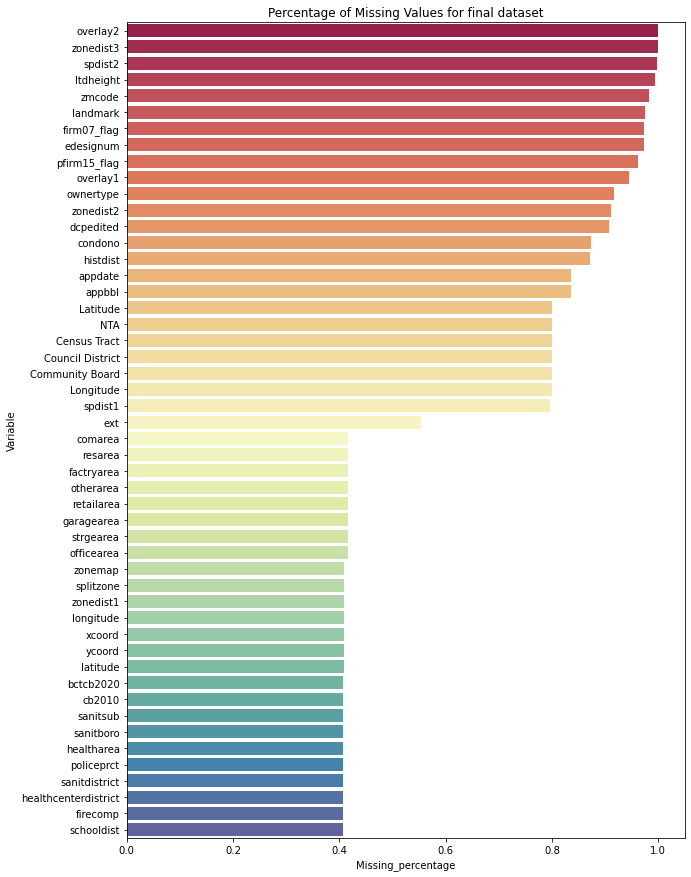

In [33]:
def missing_percentage(df, title):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0].sort_values(by='Missing_percentage', ascending=False)

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,15))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf.head(50),
               palette='Spectral').set(title=title)
    
    return nadf
df_all_na=missing_percentage(df_all, title='Percentage of Missing Values for final dataset')

In [34]:
df_all_na.shape

(98, 2)

In [37]:
df_all_na

,Variable,Missing_percentage
161,overlay2,0.9997
160,zonedist3,0.9990
159,spdist2,0.9984
158,ltdheight,0.9930
157,zmcode,0.9833
156,landmark,0.9758
155,firm07_flag,0.9734
154,edesignum,0.9725
153,pfirm15_flag,0.9625
152,overlay1,0.9440


In [43]:
wrong_full_address=[]
wrong_address=[]

wrongadd=pd.DataFrame()

geolocator = Nominatim(user_agent="example app")
for ind in energy.index:
    try:
        location=geolocator.geocode(energy['Full Address'][ind])
        energy['Latitude'][ind]=location.latitude
        energy['Longitude'][ind]=location.longitude
    except:
        wrong_full_address.append(energy['Full Address'][ind])
        wrong_address.append(energy['address'][ind])
        
    wrongadd['full address']=pd.Series(wrong_full_address)
    wrongadd['address']=pd.Series(wrong_address)
    

In [44]:
wrong_full_address

['335-347 EAST 24TH STREET , Manhattan',
 '411-421 1ST AVENUE , Manhattan',
 '40 AUDOBON AVENUE , Manhattan',
 '40 AUDOBON AVENUE , Manhattan',
 '6-APR WASHINGTON PLACE , Manhattan',
 '1255 AMSTERDAM AVENUE SCHL , Manhattan',
 'EIGHT 3RD AVENUE , Manhattan',
 '5-MAR WASHINGTON PL, Manhattan',
 'ONE BRYANT PARK , Manhattan',
 '1285TH AVENUE OF THE AMERICAS , Manhattan',
 'EAST 23RD STREET AT FDR DR , Manhattan',
 '122ND STREET AT MT MORRIS PARK WEST , Manhattan',
 'MID CENTRAL PARK AT 97TH STREET TRANSVERSE , Manhattan',
 'BRADHURST AVENUE AT 146TH STREET , Manhattan',
 '28-30TH AVENUE A , Manhattan',
 '64 CHARLTON STREET ENT , Manhattan',
 '39TH AVENUE OF THE AMERICAS , Manhattan',
 '330 WEST 40TH STREET HVU , Manhattan',
 '13-NOV EAST 31ST STREET , Manhattan',
 '116 W. 31TH STREET , Manhattan',
 '1414TH AVENUE OF AMERICA , Manhattan',
 '815 AVEMIE OF THE AMERICAS , Manhattan',
 '196 GRAND LLC , Manhattan',
 '451 LEXTINGTON AVENUE , Manhattan',
 '481 8TH AVENUE & 34TH STREET , Manhatta

<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 482 addresses that cannot get longitude and latitude values</font> </li>
    <li> <font color='red'>Some are because of typos, wrong address, multiple addresses</font> </li>
    <li> <font color='red'>Might be corrected manually.</font> </li>
</div>

In [45]:
df_all.shape

(9953, 162)

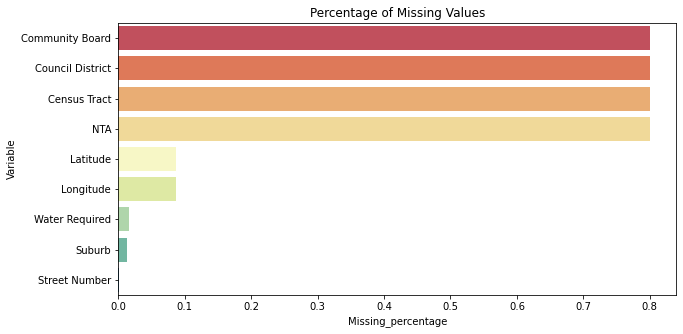

In [47]:
def missing_percentage(df):
    nadf=(round(df.isna().sum().sort_values(ascending=True)/len(df),4)).reset_index()
    nadf.columns=['Variable','Missing_percentage']
    nadf=nadf[nadf['Missing_percentage']>0].sort_values(by='Missing_percentage', ascending=False)

    if len(nadf)>0 :        
        fig, ax = plt.subplots(figsize=(10,5))
        sns.barplot(x='Missing_percentage',
               y='Variable',
               data=nadf.head(50),
               palette='Spectral').set(title='Percentage of Missing Values')
    
    return nadf

energy_na=missing_percentage(energy)

In [49]:
print('there are '+ str(len(energy_na)) +' missing variables in df ')
display(energy_na)

there are 9 missing variables in df 


,Variable,Missing_percentage
69,Community Board,0.7997
70,Council District,0.7997
71,Census Tract,0.7997
72,NTA,0.7997
67,Latitude,0.0870
68,Longitude,0.0870
66,Water Required,0.0164
65,Suburb,0.0134
64,Street Number,0.0006


In [50]:
# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

# lons_lats_vect = np.column_stack((lons_vect, lats_vect)) # Reshape coordinates
# polygon = Polygon(lons_lats_vect) # create polygon
# point = Point(y,x) # create point
# print(polygon.contains(point)) # check if polygon contains point
# print(point.within(polygon)) # check if a point is in the polygon 

<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>After merging the energy dataset and PLUTO, there are 98 variables with missing values.</font> </li>
    <li> <font color='red'>Need to fix most missing values in case there are some important message omitted. </font> </li>
    <li> <font color='red'>Might be corrected manually.</font> </li>
</div>

In [51]:
energy.head()

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag,Suburb,address,Full Address
0,Adult Education,16037,6310419,The Art Students League of New York,0,0,Not Applicable: Standalone Property,No,1010290023,1010290023,1080846,215 W 57th Street,Not Available,10019,215,W 57th Street,Manhattan,33497.0,"Adult Education, Museum",Adult Education,31497,Museum,2000,Not Available,Not Available,1892,1,100,Whole Property,Not Available,Not Available,303.7,150.8,150.7,303.8,24.4,0.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2265826,22680,2783803,815885.9,815885.9,Not Available,Not Available,356.1,120.3,235.8,Not Available,Not Available,No,7/8/20,40.766235,-73.980596,NaN,NaN,NaN,NaN,0,0,0,Manhattan,215 WEST 57TH STREET,"215 WEST 57TH STREET , Manhattan"
2,Adult Education,22837,7069172,French: 22 East 60th St.,0,0,Not Applicable: Standalone Property,No,1013740047,1013740047,1040761,22 East 60th Street,Not Available,10022,22,East 60th Street,Manhattan,48562.0,Adult Education,Adult Education,48562,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Property,Not Available,Not Available,249.6,129,129.4,248.9,18.5,0.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,934902.1,Not Available,Not Available,2274756.9,22658.3,3074890.2,901198.7,898735.9,Not Available,Not Available,443.3,120.8,322.5,Not Available,Not Available,No,4/17/20,40.763826,-73.970561,NaN,NaN,NaN,NaN,0,0,0,Manhattan,22 EAST 60TH STREET,"22 EAST 60TH STREET , Manhattan"
14,Adult Education,22772,7066342,235 East 11th Street,0,0,Not Applicable: Standalone Property,No,1004677501,1004677501,1006849,235 East 11th Street,Not Available,10003,235,East 11th Street,Manhattan,41759.0,"Adult Education, Multifamily Housing",Adult Education,26070,Multifamily Housing,15689,Not Available,Not Available,1926,1,100,Whole Property,Whole Property,Not Available,130.2,86.5,85.6,131,7.1,0,Not Available,2535684.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,16860,169.7,1020492.7,299089.3,298546.5,Not Availabl

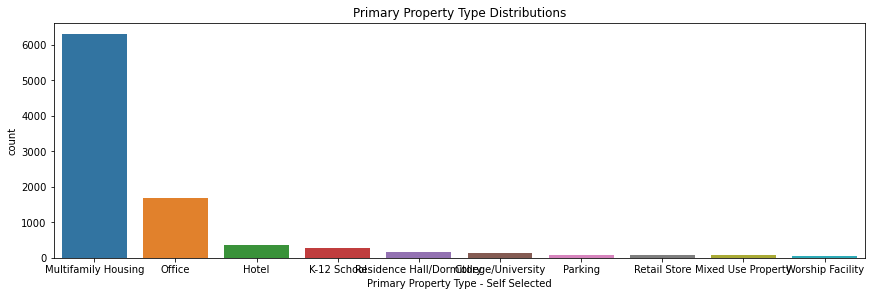

In [52]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
ax=sns.countplot(x="Primary Property Type - Self Selected",
            order = energy['Primary Property Type - Self Selected'].value_counts().iloc[:10].index,
            data=energy)
plt.title('Primary Property Type Distributions')
plt.show()

In [53]:
energy.shape

(9781, 73)

In [54]:
energy_multifamily=energy[energy['Primary Property Type - Self Selected']=='Multifamily Housing']

In [55]:
energy_multifamily.shape

(6301, 73)

In [56]:
def fuel_use_cleasing(df, field):
    df[field]=np.where(df[field]=='Not Available', '0', df[field])
    df[field]=df[field].astype(float)
    
fuel_use_cleasing(energy_multifamily, 'Fuel Oil #1 Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Fuel Oil #2 Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Fuel Oil #4 Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Fuel Oil #5 & 6 Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Diesel #2 Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Kerosene Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Propane Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'District Steam Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'District Hot Water Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'District Chilled Water Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Natural Gas Use (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Weather Normalized Site Natural Gas Use (therms)')
fuel_use_cleasing(energy_multifamily, 'Electricity Use - Grid Purchase (kBtu)')
fuel_use_cleasing(energy_multifamily, 'Electricity Use Grid Purchase (kWh)')
fuel_use_cleasing(energy_multifamily, 'Weather Normalized Site Electricity (kWh)')
fuel_use_cleasing(energy_multifamily, 'Annual Maximum Demand (kW)')
fuel_use_cleasing(energy_multifamily, 'Total GHG Emissions (Metric Tons CO2e)')
fuel_use_cleasing(energy_multifamily, 'Direct GHG Emissions (Metric Tons CO2e)')
fuel_use_cleasing(energy_multifamily, 'Indirect GHG Emissions (Metric Tons CO2e)')
fuel_use_cleasing(energy_multifamily, 'Water Use (All Water Sources) (kgal)')
fuel_use_cleasing(energy_multifamily, 'Water Intensity (All Water Sources) (gal/ft)')

In [57]:
energy_multifamily['Fuel Oil Use']=energy_multifamily['Fuel Oil #1 Use (kBtu)'] + \
                                    energy_multifamily['Fuel Oil #2 Use (kBtu)'] + \
                                    energy_multifamily['Fuel Oil #4 Use (kBtu)']+ \
                                    energy_multifamily['Fuel Oil #5 & 6 Use (kBtu)']

In [58]:
energy_multifamily['Full Address'].unique().shape

(5989,)

In [60]:
energy_multifamily[[
 'Address 1 (self-reported)',
 'Borough',
 'Self Reported Gross Floor Area (ft)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Source EUI kBtu ft',
 'Weather Normalized Site EUI (kBtu/ft)',
 'Site EUI (kBtu/ft)',
 'Weather Normalized Source EUI (kBtu/ft)',
 'Weather Normalized Site Electricity Intensity (kWh/ft)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft)',
 'Fuel Oil Use',
 'Diesel #2 Use (kBtu)',
 'Kerosene Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Water Use (All Water Sources) (kgal)',
 'Water Intensity (All Water Sources) (gal/ft)',
 'Generation Date',
 'Community Board',
 'Council District',
 'Census Tract',
 'Full Address']]

,Address 1 (self-reported),Borough,Self Reported Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil Use,Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Generation Date,Community Board,Council District,Census Tract,Full Address
6993,80 Warren St; 76 Warren St.,Manhattan,70000.0,1915,1,Whole Property,Whole Property,61,105.1,68.5,69.2,103.6,5.3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3543980.1,35326.2,1297805.5,380365.0,370738.1,0.0,Not Available,298.1,188.2,109.9,1381.0,19.73,4/22/20,101.0,1.0,21.0,"80 WARREN STREET 76 WARREN STREET , Manhattan"
7001,150 West 80th Street,Manhattan,53111.0,1912,1,Whole Property,Whole Property,73,110.5,85.1,85.6,109.6,3.4,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3916293.5,39034.5,627726.3,183976.0,180426.3,0.0,Not Available,261.2,208.0,53.2,2583.8,48.65,7/30/20,107.0,6.0,165.0,"150 WEST 80TH STREET , Manhattan"
7003,647-651 West 171st Street,Manhattan,50802.0,1922,1,Whole Property,Whole Property,81,110.5,Not Available,87.3,Not Available,Not Available,Not Available,3633210.1,0.0,0.0,0.0,0.0,0.0,0.0,170239.1,0.0,630682.0,184842.3,0.0,0.0,Not Available,336.0,282.6,53.4,2336.9,46.00,7/27/20,112.0,10.0,253.0,"647-651 WEST 171ST STREET , Manhattan"
7007,35-39 West 33rd Street,Manhattan,148598.0,2003,1,Whole Property,Not Available,100,54.2,30,30,54.2,3.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2593440.9,25934.4,1984760.4,581699.9,581699.9,0.0,Not Available,305.8,137.8,168.1,0.0,0.00,3/2/20,105.0,4.0,76.0,"35-39 WEST 33RD STREET , Manhattan"
7011,49 East 21st Street,Manhattan,72807.0,1913,1,Whole Property,Whole Property,13,153.9,76.4,76.7,153.2,12.2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2532127.0,25239.0,3052004.3,894491.2,889791.2,0.0,Not Available,393.0,134.5,258.5,2314.2,31.78,6/29/20,105.0,2.0,56.0,"49 EAST 21ST STREET , Manhattan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42897,2395 ADAM C POWELL BOULEVARD,Manhattan,57505.0,2017,1,Whole Property,Not Available,100,34,12.1,12.1,34,3.6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,513.3,5.1,698096.6,204600.4,204600.4,0.0,Not Available,59.1,0.0,59.1,0.0,0.00,6/15/20,NaN,NaN,NaN,"2395 ADAM C POWELL BOULEVARD , Manhattan"
42901,108 East 86th Street,Manhattan,50890.0,1924,1,Whole Property,Whole Property,33,139.1,107,106.3,139,5,0.1,4008486.0,0.0,0.0,0.0,0.0,0.0,0.0,511366.7,5039.5,890764.0,261068.0,253724.5,0.0,Not Available,400.1,324.6,75.4,2409.5,47.35,7/29/20,NaN,NaN,NaN,"108 EAST 86TH STREET , Manhattan"
42913,1380 FIRST AVENUE,Manhattan,30422.0,1910,1,Whole Property,Whole Property,23,167.6,120.1,120.3,167.2,7.4,0.2,2263291.7,0.0,0.0,0.0,0.0,0.0,0.0,625473.3,6254.7,769606.1,225558.6,224547.5,0.0,Not Available,268.8,203.6,65.2,2648.9,87.07,8/3/20,NaN,NaN,NaN,"1380 1ST AVENUE , Manhattan"
42917,262 W 107th Street,Manhattan,49415.0,1925,1,Whole Property,Whole Property,58,116.2,91.3,90.3,116.8,3.5,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3855831.2,39168.7,604256.4,177097.4,173687.7,0.0,Not Available,256.0,204.8,51.2,1776.4,35.95,7/30/20,NaN,NaN,NaN,"262 WEST 107TH STREET , Manhattan"


In [61]:
energy_multifamily['Generation Date']

6993     4/22/20
7001     7/30/20
7003     7/27/20
7007     3/2/20 
7011     6/29/20
          ...   
42897    6/15/20
42901    7/29/20
42913    8/3/20 
42917    7/30/20
42925    6/24/20
Name: Generation Date, Length: 6301, dtype: object

<div class="alert-warning">
    <b>Findings </b> 
    <li> <font color='red'>There are 6301 fuel use information recorded for multifamily building. </font> </li>
    <li> <font color='red'> The data are mostly collected in 2020.</font> </li>
    <li> <font color='red'> There is no time series data.</font> </li>
</div>

In [62]:
energy_multifamily['Community Board'].value_counts()

108.0    329
107.0    208
106.0    149
112.0    124
105.0    73 
102.0    66 
104.0    66 
101.0    49 
109.0    30 
111.0    18 
103.0    18 
110.0    11 
Name: Community Board, dtype: int64

In [63]:
df=energy_multifamily[ ['Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Source EUI kBtu ft',
 'Weather Normalized Site EUI (kBtu/ft)',
 'Site EUI (kBtu/ft)',
 'Weather Normalized Source EUI (kBtu/ft)',
 'Weather Normalized Site Electricity Intensity (kWh/ft)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft)',
 'Fuel Oil Use',
 'Diesel #2 Use (kBtu)',
 'Kerosene Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Water Use (All Water Sources) (kgal)',
 'Water Intensity (All Water Sources) (gal/ft)',
 'Generation Date',
 'Community Board']]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 6993 to 42925
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Metered Areas (Energy)                                     6301 non-null   object 
 1   Metered Areas  (Water)                                     6301 non-null   object 
 2   ENERGY STAR Score                                          6301 non-null   object 
 3   Source EUI kBtu ft                                         6301 non-null   object 
 4   Weather Normalized Site EUI (kBtu/ft)                      6301 non-null   object 
 5   Site EUI (kBtu/ft)                                         6301 non-null   object 
 6   Weather Normalized Source EUI (kBtu/ft)                    6301 non-null   object 
 7   Weather Normalized Site Electricity Intensity (kWh/ft)     6301 non-null   object 
 8   Weat

In [65]:
df_sum_Meter=df.groupby(['Metered Areas (Energy)']).sum()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 6993 to 42925
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Metered Areas (Energy)                                     6301 non-null   object 
 1   Metered Areas  (Water)                                     6301 non-null   object 
 2   ENERGY STAR Score                                          6301 non-null   object 
 3   Source EUI kBtu ft                                         6301 non-null   object 
 4   Weather Normalized Site EUI (kBtu/ft)                      6301 non-null   object 
 5   Site EUI (kBtu/ft)                                         6301 non-null   object 
 6   Weather Normalized Source EUI (kBtu/ft)                    6301 non-null   object 
 7   Weather Normalized Site Electricity Intensity (kWh/ft)     6301 non-null   object 
 8   Weat

In [67]:
df_sum_cb=df.groupby(['Community Board']).sum().reset_index()
df_sum_cb

,Community Board,Fuel Oil Use,Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft)
0,101.0,7641956.8,0.0,0.0,0.0,5.226960e+07,0.0,0.0,4.757278e+08,4754960.0,3.327754e+08,97530866.8,96303481.8,0.0,57492.8,25840.0,31653.3,321708.8,1401.80
1,102.0,81161151.0,0.0,0.0,0.0,1.091439e+07,0.0,0.0,4.744430e+08,4714891.4,2.784203e+08,81600305.4,79944932.5,0.0,55571.3,31267.3,24304.0,885911.7,10713.04
2,103.0,17269088.6,0.0,0.0,0.0,3.528073e+06,0.0,0.0,1.624329e+08,1631742.5,1.209252e+08,35441140.8,35062354.7,0.0,20384.6,9909.1,10475.6,1893258.3,18707.02
3,104.0,144019262.7,0.0,0.0,0.0,5.649505e+07,0.0,0.0,7.487059e+08,7494303.0,3.092955e+08,90649324.4,89759062.4,0.0,80443.4,50498.3,29945.3,393724.4,2466.38
4,105.0,101923019.5,0.0,0.0,0.0,2.557346e+08,0.0,0.0,5.332620e+08,5307250.1,5.850312e+08,171462826.4,170204781.3,0.0,101256.2,35962.5,65293.7,347379.2,1945.52
5,106.0,287359371.0,0.0,0.0,0.0,1.048399e+10,0.0,0.0,8.358484e+08,8322894.9,6.211255e+08,182041455.1,179846009.1,0.0,814796.6,66072.6,748723.8,514537.3,3553.66
6,107.0,499133002.7,0.0,0.0,0.0,1.804894e+08,0.0,0.0,1.350350e+09,13031842.7,7.569031e+08,221835576.2,217382423.9,893.9,185458.3,109298.3,76161.5,2340007.3,16685.62
7,108.0,573579063.6,0.0,0.0,0.0,6.721979e+08,0.0,0.0,1.724433e+09,16918777.7,1.232476e+09,361218092.5,354833149.6,0.0,283701.5,134596.5,149103.9,1133857.8,7170.53
8,109.0,53894425.4,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.730273e+08,1506764.1,4.809434e+07,14095643.7,13203871.2,0.0,17302.2,13229.1,4072.9,122747.5,1481.00
9,110.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7.296864e+07,731365.3,4.575536e+07,13410126.9,13256241.7,0.0,7750.8,3875.9,3874.9,44426.5,328.43


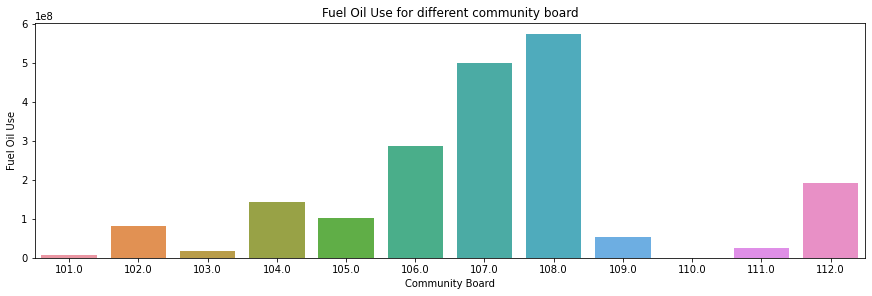

In [68]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='Fuel Oil Use', data = df_sum_cb)
plt.title('Fuel Oil Use for different community board')
plt.show()

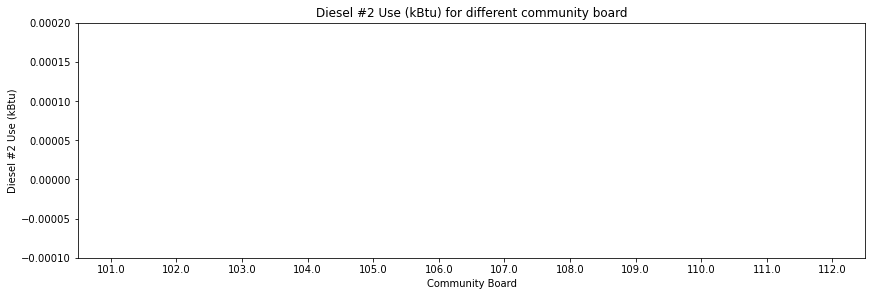

In [69]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='Diesel #2 Use (kBtu)', data = df_sum_cb)
plt.title('Diesel #2 Use (kBtu) for different community board')
plt.ylim((-0.0001, 0.0002))
plt.show()

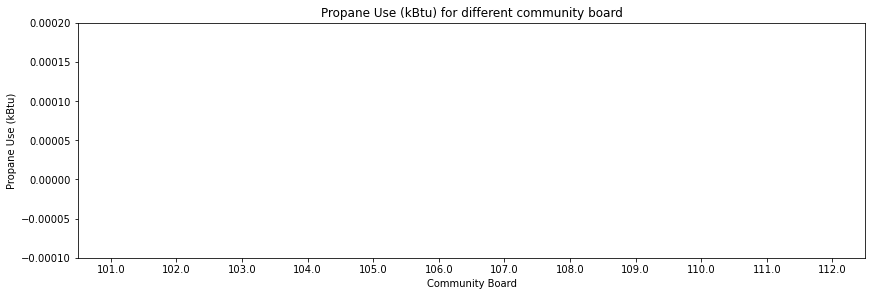

In [70]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='Propane Use (kBtu)', data = df_sum_cb)
plt.title('Propane Use (kBtu) for different community board')
plt.ylim((-0.0001, 0.0002))
plt.show()

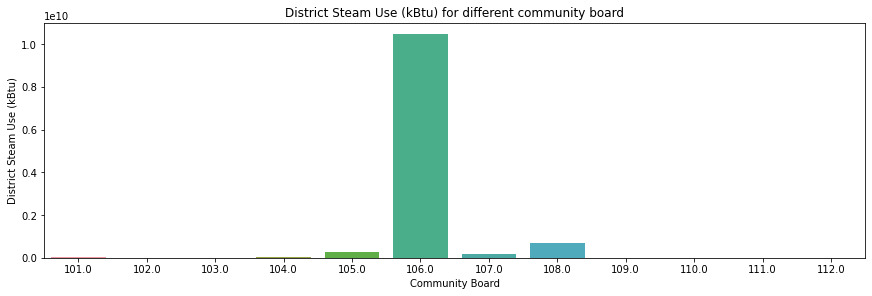

In [71]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='District Steam Use (kBtu)', data = df_sum_cb)
plt.title('District Steam Use (kBtu) for different community board')
plt.show()

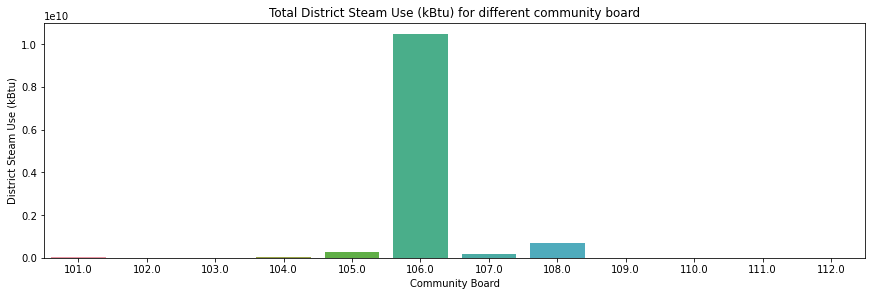

In [72]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='District Steam Use (kBtu)', data = df_sum_cb)
plt.title('Total District Steam Use (kBtu) for different community board')
plt.show()

In [73]:
df_natural_gas=energy_multifamily.groupby('Community Board')

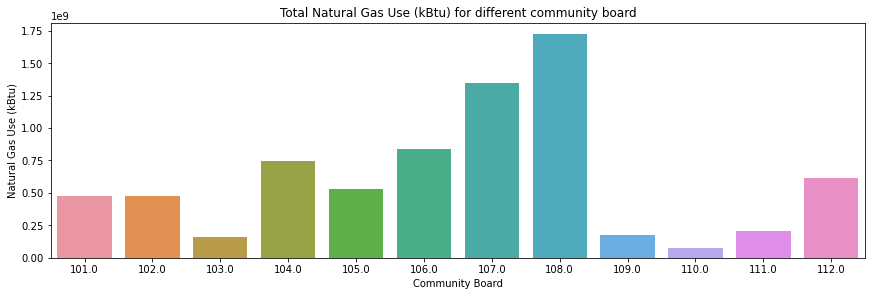

In [74]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.barplot(x ='Community Board', y ='Natural Gas Use (kBtu)', data = df_sum_cb)
plt.title('Total Natural Gas Use (kBtu) for different community board')
plt.show()

In [76]:
energy.columns.tolist()

['Primary Property Type - Self Selected',
 'Order',
 'Property Id',
 'Property Name',
 'Parent Property Id',
 'Parent Property Id2',
 'Parent Property Name',
 'City Building',
 'BBL - 10 digits',
 'NYC Borough, Block and Lot (BBL) self-reported',
 'NYC Building Identification Number (BIN)',
 'Address 1 (self-reported)',
 'Address 2 (self-reported)',
 'Postal Code',
 'Street Number',
 'Street Name',
 'Borough',
 'Self Reported Gross Floor Area (ft)',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Source EUI kBtu ft',
 'Weather Normalized Site EUI (kBtu/ft)',
 'Site EUI (kBtu/ft)',
 'W

In [77]:
energy['Metered Areas (Energy)'].unique()

array(['Whole Property', 'Another configuration', 'Not Available',
       'Common areas (all energy loads)',
       'Tenant Hot Water, Tenant Heating, Common Area Plug Load/Electricity, Common Area Heating, Common Area Cooling, Common Area Hot Water',
       'Common Area Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Tenant Plug Load/Electricity'],
      dtype=object)

In [84]:
len(energy['BBL - 10 digits'])

9781

In [79]:
energy.shape

(9781, 73)

In [90]:
energy.shape

(9781, 73)

In [91]:
df1=energy[energy['Primary Property Type - Self Selected']=='Multifamily Housing']
df1.shape

(6301, 73)

In [93]:
df1.groupby('Full Address').count().sort_values(by='BBL - 10 digits', ascending=False).head(50)

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag,Suburb,address
Full Address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"102 WEST 137TH STREET , Manhattan",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,7,7,7,0,0,0,0,7,7,7,7,7
"410 WEST 118TH STREET , Manhattan",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,7,7,7
"401 1ST AVE; 400 2ND AVE;319 E. 24TH STREET 311 E. 23RD STREET 333 E. 23RD STREET , Manhattan",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,0,0,0,0,0,0,5,5,5,5,5
"1370TH STREET NICHOLAS AVENUE , Manhattan",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,1,1,1,1,1,1,5,5,5,5,5
"255 WEST 23RD STREET , Manhattan",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,2,2,4,4,4,4,4
"305 WEST 97TH STREET , Manhattan",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3,3,3,3
"240 WEST 116TH STREET , Manhattan",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3,3,3,3
"284 5TH AVENUE , Manhattan",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3,3,3,3
"252 WEST 30TH STREET , Manhattan",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3,3,3,3


In [92]:
df1[df1['Full Address']=='ERROR: #VALUE! ERROR: #VALUE! , Manhattan']

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag,Suburb,address,Full Address
10001,Multifamily Housing,1282,2008956,Site 18B,0,0,Not Applicable: Standalone Property,No,1000160185,1-00016-0185,1086547,211NEA,Not Available,10282,ERROR: #VALUE!,ERROR: #VALUE!,Manhattan,300000.0,"Multifamily Housing, Office, Other - Recreation, Parking",Multifamily Housing,297000,Parking,7732,Other - Recreation,3000,2006,1,100,Whole Property,Whole Property,16,156.8,105,105,156.8,7.8,0.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,23498025.1,234980.3,7991442.7,2342157.6,2342157.6,Not Available,Not Available,1924.9,1248.1,676.8,11288.8,37.63,Yes,5/3/20,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,Manhattan,ERROR: #VALUE! ERROR: #VALUE!,"ERROR: #VALUE! ERROR: #VALUE! , Manhattan"
12163,Multifamily Housing,1283,2008956,Site 18B,0,0,Not Applicable: Standalone Property,No,1000160185,1-00016-0185,1086547,211NEA,Not Available,10282,ERROR: #VALUE!,ERROR: #VALUE!,Manhattan,300000.0,"Multifamily Housing, Office, Other - Recreation, Parking",Multifamily Housing,297000,Parking,7732,Other - Recreation,3000,2006,1,100,Whole Property,Whole Property,20,151.1,100.2,100.2,151.1,7.7,0.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,22198767.2,221987.7,7861930.3,2304199.7,2304199.7,Not Available,Not Available,1844.9,1179.1,665.8,11288.8,37.63,Yes,4/16/20,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,Manhattan,ERROR: #VALUE! ERROR: #VALUE!,"ERROR: #VALUE! ERROR: #VALUE! , Manhattan"


In [95]:
df1[df1['Full Address']=='102 WEST 137TH STREET , Manhattan']

,Primary Property Type - Self Selected,Order,Property Id,Property Name,Parent Property Id,Parent Property Id2,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,Self Reported Gross Floor Area (ft),List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI kBtu ft,Weather Normalized Site EUI (kBtu/ft),Site EUI (kBtu/ft),Weather Normalized Source EUI (kBtu/ft),Weather Normalized Site Electricity Intensity (kWh/ft),Weather Normalized Site Natural Gas Intensity (therms/ft),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Kerosene Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft),Water Required,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Data Quality Flag,Emissions Flag,Energy Flag,Suburb,address,Full Address
18105,Multifamily Housing,11956,5903481,BUFNY Housing,5903481,0,BUFNY Housing,No,1019210007;1019210037;1019210038;1019210040;1019210046;1019210057,1-01921-0007;1-01921-0037;1-01921-0038;1-01921-0040;1-01921-0046;1-01921-0057,1058312;1058338;1058339;1058341;1058345;1058352,102 West 137th Street,Not Available,10030,102,West 137th Street,Manhattan,54000.0,"Multifamily Housing, Other",Multifamily Housing,50000,Other,4000,Not Available,Not Available,2000,6,100,Whole Property,Whole Property,13,263.5,192.9,192.4,263.4,10.2,1.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,8492580,85431.3,1897885,556238.2,549686,Not Available,Not Available,611.8,451.1,160.7,1923.2,35.62,NaN,7/8/20,40.815411,-73.940591,NaN,NaN,NaN,NaN,0,0,0,Manhattan,102 WEST 137TH STREET,"102 WEST 137TH STREET , Manhattan"
37736,Multifamily Housing,26223,11621164,BBL 1-01921-0037,5903481,0,BUFNY Housing,No,1019210037,1-01921-0037,1058312,102 West 137th Street,Not Available,10030,102,West 137th Street,Manhattan,1.0,Multifamily Housing,Multifamily Housing,1,Not Available,Not Available,Not Available,Not Available,2000,1,100,Not Available,Not Available,Not Available,1136361,808652.7,807873.5,1131408,47282.3,6473.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,643248.7,6473.3,164624.8,48248.8,47282.3,Not Available,Not Available,48.1,34.2,13.9,Not Available,Not Available,Yes,7/8/20,40.815411,-73.940591,NaN,NaN,NaN,NaN,0,1,1,Manhattan,102 WEST 137TH STREET,"102 WEST 137TH STREET , Manhattan"
37744,Multifamily Housing,26228,11621255,BBL 1-01921-0040,5903481,0,BUFNY Housing,No,1019210040,1-01921-0040,1058352,102 West 137th Street,Not Available,10030,102,West 137th Street,Manhattan,1.0,Multifamily Housing,Multifamily Housing,1,Not Available,Not Available,Not Available,Not Available,2000,1,100,Not Available,Not Available,Not Available,1762967,1264217,1270152,1750661,70881.4,10223.7,Not Available,Not Available,Not Available,Not Available,Not Avai